In [1]:
# Loading libraries and modules
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data from a .csv
data = pd.read_csv("/content/Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
#validate missing values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
#drop unused columns
data = data.drop(['CustomerID'], axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [6]:
data.describe(include='all')

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


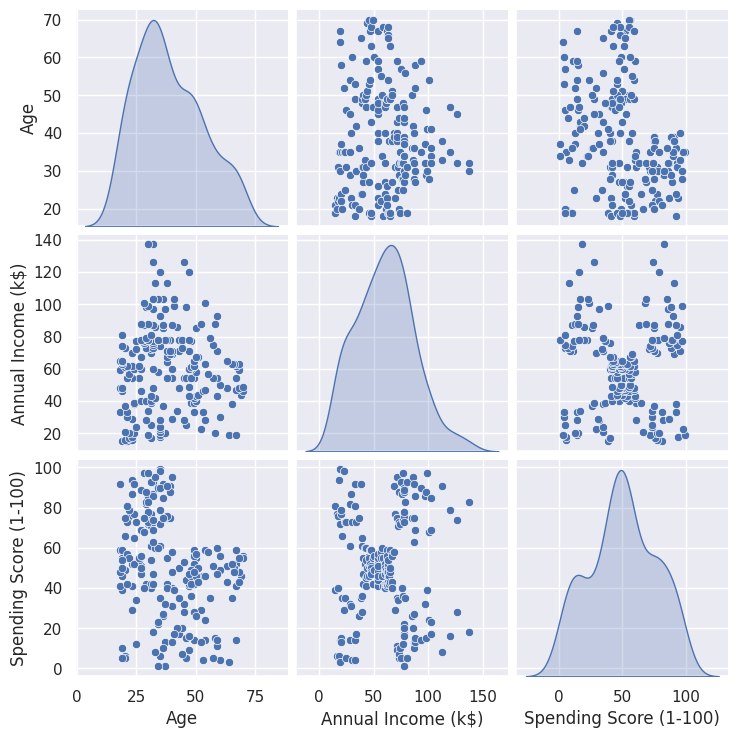

In [7]:
#Visualizing Data Distributions
sns.pairplot(data, diag_kind='kde')
plt.show()

In [8]:
#Remove the outliers
q1 = data['Spending Score (1-100)'].quantile(0.99)
q2 = data['Annual Income (k$)'].quantile(0.99)
data = data[data['Spending Score (1-100)'] < q1]
data = data[data['Annual Income (k$)'] < q2]
data.describe(include='all')

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,196,196.000000,196.000000,196.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,110,NaN,NaN,NaN
mean,NaN,38.969388,60.183673,49.704082
std,NaN,14.082871,25.056386,25.407130
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.000000,42.000000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,72.000000


## Visualizing Data Correlation

<Axes: >

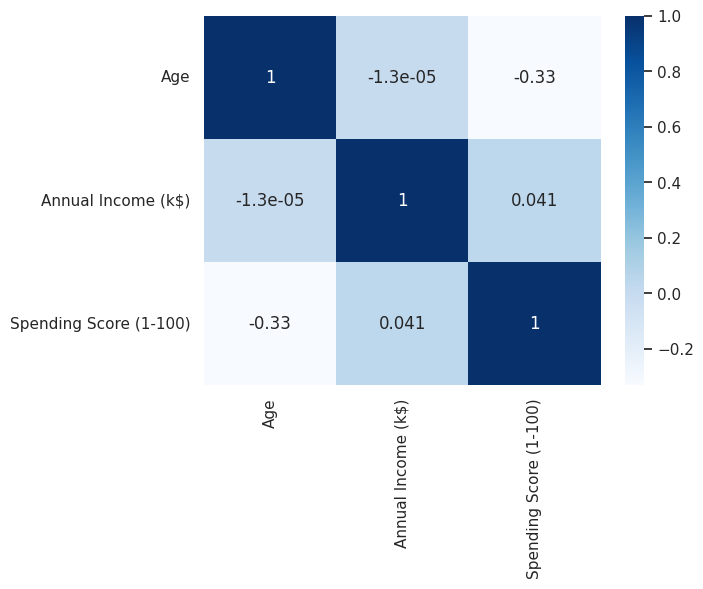

In [9]:
# correlation plot
data_num = data.select_dtypes(include=['number'])
corr = data_num.corr()
sns.heatmap(corr, cmap = 'Blues', annot= True)

In [10]:
#define category features
data_cat = data.select_dtypes(include=['object'])

# Calculate and display the number of unique values for each 'object' column
for column in data_cat.columns:
    unique_count = data_cat[column].nunique()
    print(f"Column '{column}' has {unique_count} unique values.")

Column 'Gender' has 2 unique values.


In [11]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.1 MB/s eta 0:00:00


In [12]:
# encode variables with ordinal encoding
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=data_cat)
data = encoder.fit_transform(data)
data

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,2,20,16,6
3,2,23,16,77
4,2,31,17,40
...,...,...,...,...
193,2,38,113,91
194,2,47,120,16
195,2,35,120,79
196,2,45,126,28


In [13]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

x = data.copy()
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

### Dimensionality Reduction

In [14]:
#Initiating PCA to reduce dimentions
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(x_scaled)
PCA_ds = pd.DataFrame(pca.transform(x_scaled), columns=(["col1","col2", ]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,196.0,-2.718914e-17,1.164507,-2.049716,-1.016941,0.052891,0.993183,2.859686
col2,196.0,0.000000e+00,1.008572,-2.175809,-0.700532,0.008072,0.770303,2.897154


### Plot Data in The Reduced Dimension

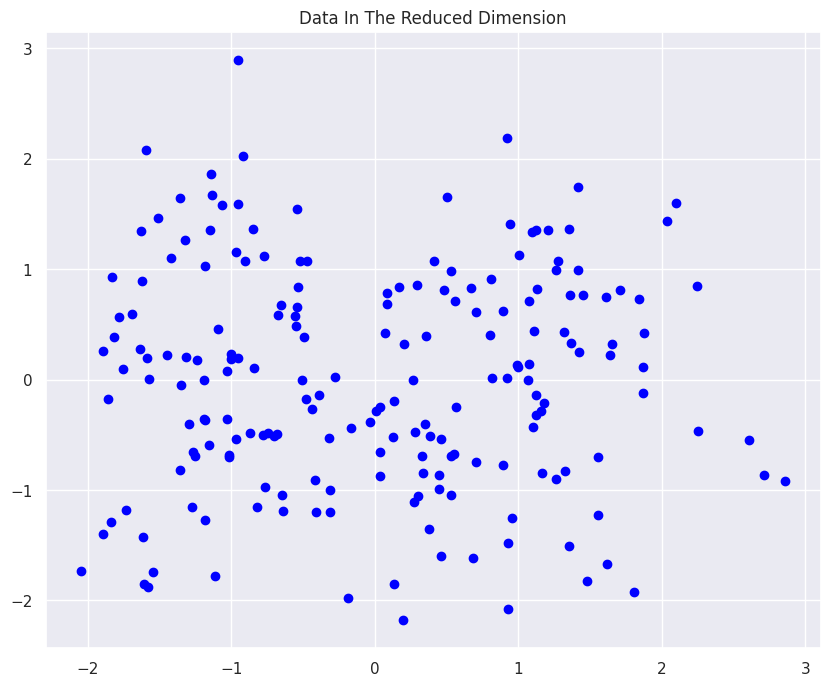

In [15]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.scatter(PCA_ds["col1"], PCA_ds["col2"], c="blue", marker="o" )
ax.set_title("Data In The Reduced Dimension")
plt.show()

### Find Numbers of Clusters

Elbow Method to determine the number of clusters to be formed:


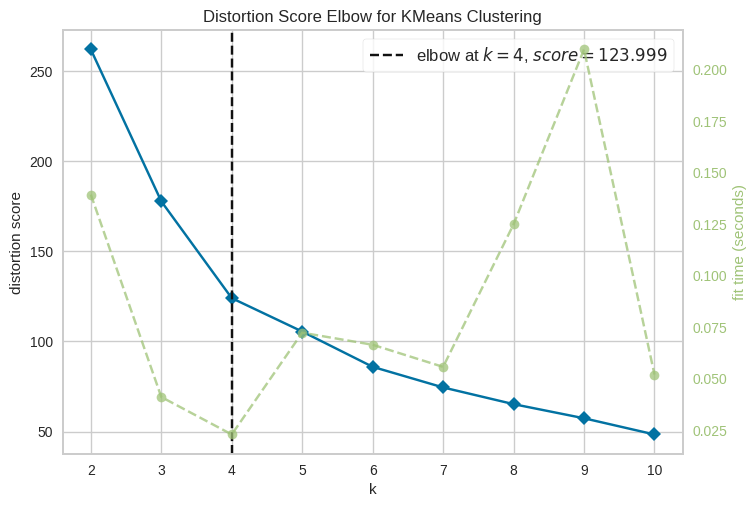

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
from yellowbrick.cluster import KElbowVisualizer

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k = 10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

# Model Selection

## Creating the model

In [17]:
kmeans_new = KMeans(4)
kmeans_new.fit(PCA_ds)
y_hat = kmeans_new.fit_predict(PCA_ds)
PCA_ds["Cluster"] = y_hat
data["Cluster"] = y_hat

### Plotting the Clusters

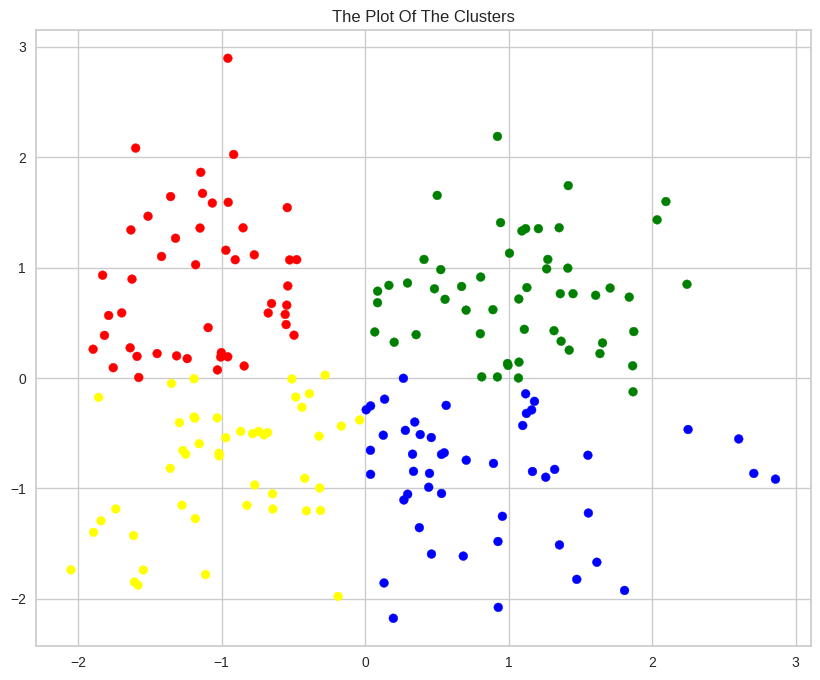

In [18]:
from matplotlib import colors
from matplotlib.colors import ListedColormap

cmap = colors.ListedColormap(["red","blue", "green","yellow"])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, label="bla")
ax.scatter(PCA_ds["col1"], PCA_ds["col2"], s=40, c=PCA_ds["Cluster"], marker='o', cmap = cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

### Checking the Distribution of Clusters

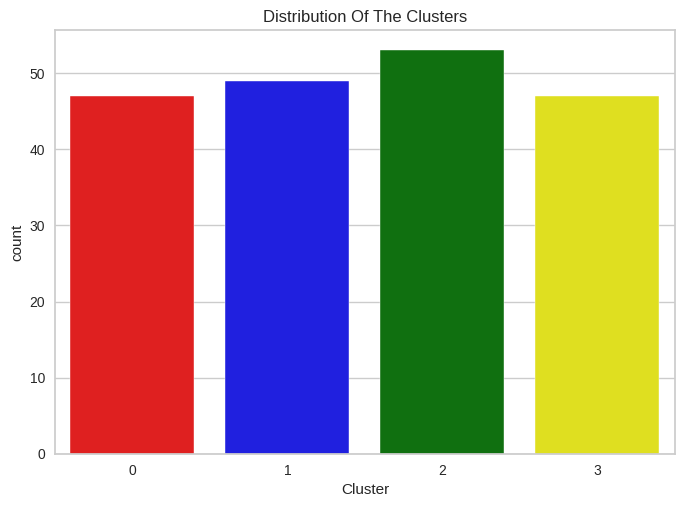

In [19]:
#Plotting countplot of clusters
pal = ["red","blue", "green","yellow"]
pl = sns.countplot(x=data["Cluster"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

The clusters appear to be distributed evenly.

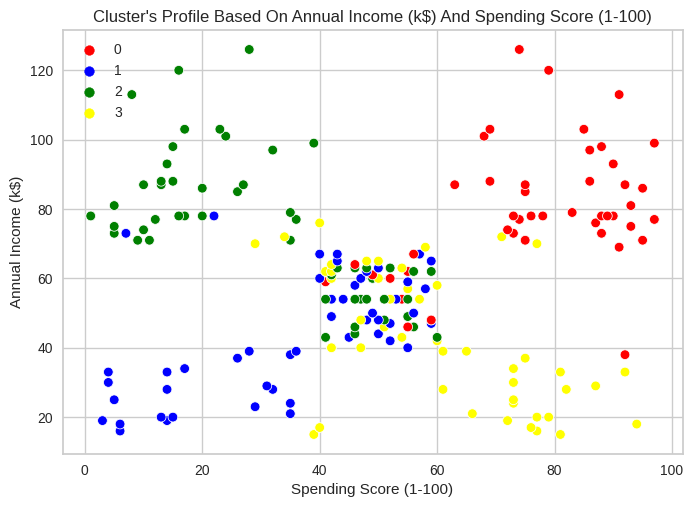

In [20]:
pl = sns.scatterplot(data = data,x=data["Spending Score (1-100)"], y=data["Annual Income (k$)"],hue=data["Cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Annual Income (k$) And Spending Score (1-100)")
plt.legend()
plt.show()

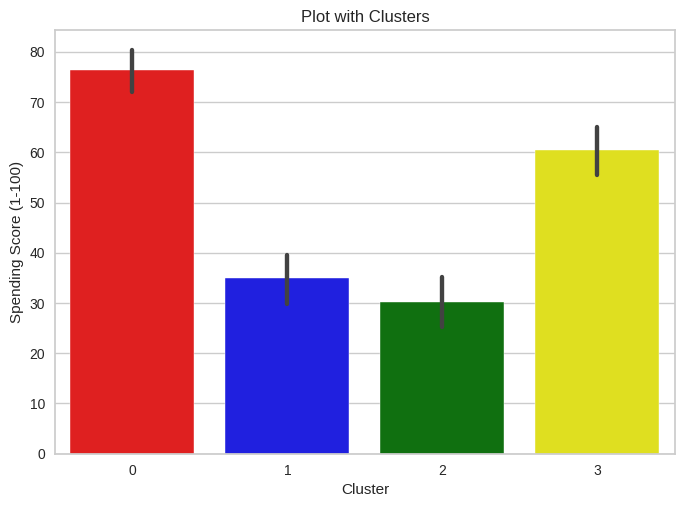

In [21]:
pl=sns.barplot(x=data["Cluster"], y=data["Spending Score (1-100)"], palette=pal)
plt.title('Plot with Clusters')
plt.xlabel('Cluster')
plt.ylabel('Spending Score (1-100)')
plt.show()

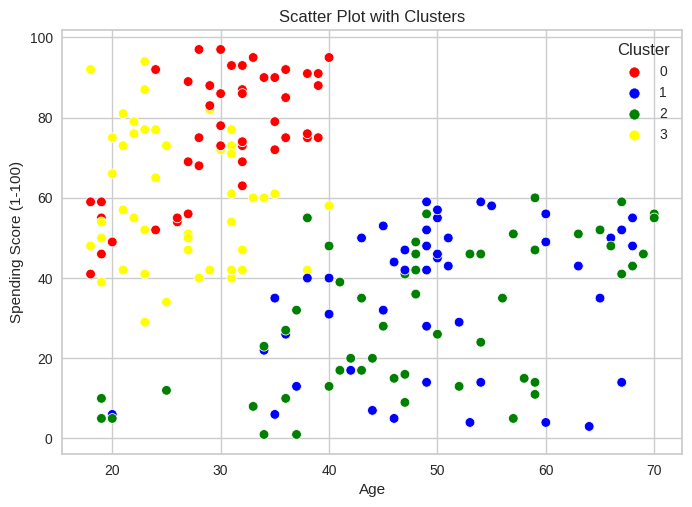

In [22]:
sns.scatterplot(data=data, x='Age', y='Spending Score (1-100)', hue='Cluster', palette= pal)
plt.title('Scatter Plot with Clusters')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

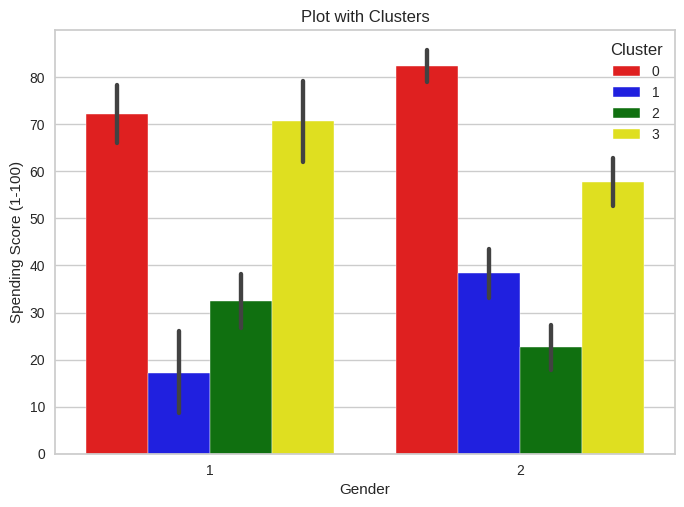

In [23]:
sns.barplot(data=data, x='Gender', y='Spending Score (1-100)', hue='Cluster', palette= pal)
plt.title('Plot with Clusters')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.show()